In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [276]:
df = pd.read_csv('Casos-coronavirus-colombia.csv')

In [277]:
X = df

In [278]:
X

,Unnamed: 0,Id,Ciudad_ubicacion,Departamento,Atencion,Edad,Sexo,Tipo,Pais_procedencia
0,24,25,0,0,0,49,0,0,0
1,27,28,1,1,0,22,0,0,1
2,32,33,2,2,0,59,0,0,0
3,44,45,3,3,0,29,0,0,0
4,53,54,2,2,0,42,1,0,0
...,...,...,...,...,...,...,...,...,...
2501,2771,2772,2,2,0,55,1,2,3
2502,2772,2773,2,2,1,65,0,2,3
2503,2773,2774,2,2,3,74,0,2,3
2504,2774,2775,2,2,0,56,0,1,3


In [279]:
X = df.drop(['Unnamed: 0'],axis=1, inplace = True)

In [280]:
trainRandom = np.random.uniform(0, 1, len(df))<= 0.8
train= df[trainRandom]
test = df[~trainRandom]


In [281]:
print(f'Numero en entrenamiento : {len(train)}')
print(f'Numero en prueba : {len(test)}')

Numero en entrenamiento : 1982
Numero en prueba : 524


In [282]:
features = df.columns.difference(['Atencion'])
features

Index(['Ciudad_ubicacion', 'Departamento', 'Edad', 'Id', 'Pais_procedencia',
       'Sexo', 'Tipo'],
      dtype='object')

In [283]:
y_ = train['Atencion']
p = pd.DataFrame({"clase":y_})

In [284]:
clf = GaussianNB()

In [285]:
clf.fit(train[features],y_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [286]:
clf.predict(test[features])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,

In [287]:
preds = df.Atencion[clf.predict(test[features])]
preds = np.array(preds[0:len(test)])

In [288]:
from sklearn.metrics import confusion_matrix
matrix = pd.crosstab(test['Atencion'],preds, rownames=['Gravedad'], colnames=['Predicted'])
matrix

Predicted,0
Gravedad,
0,408
1,25
2,19
3,72


## Graficando la matriz 

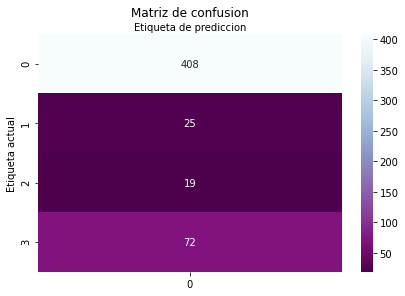

In [289]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = 'BuPu_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')
plt.savefig('NaiveBayes.png', transparence = True)

In [290]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(test['Atencion'], preds)
print('Precisión del modelo:\n',precision)

Precisión del modelo:
 0.7786259541984732


In [291]:
Y_train=train["Atencion"]

In [292]:
submission=pd.DataFrame()
submission["Id"]=train["Id"]

In [293]:
"""Make a Csv with Results"""
pred = pd.DataFrame(clf.predict(test[features]),columns=["Atencion"])
submission=submission.join(pred,how="inner")
submission.to_csv("prediccion.csv", index=False)
submission.head(10)

,Id,Atencion
0,25,0
2,33,0
3,45,0
4,54,0
5,63,0
6,64,0
7,65,0
8,67,0
10,71,0
12,82,0
